<a href="https://colab.research.google.com/github/jesicagimenez94/Python_Data_Science/blob/master/Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ALGORITMO DE REGRESION

Creamos una red neuronal con python y tensorflow.
Le damos parametros de entradas y los resultados de salida, la red debe aprender por si sola cual es el algoritmo o calculo necesario para llegar a los resultados.

In [1]:
import tensorflow as tf
import numpy as np

datos de entrada y resultados que va utilizar la red para aprender.

In [2]:
celsius = np.array([-40,-10,0,8,15,22,38], dtype=float)
fahrenheit= np.array([-40,14,32,46,59,72,100], dtype=float)

Armamos el modelo:
creamos una variable capa de tipo densa, tienen conexiones desde 1 neurona a cada neurona de las demas capas.

In [3]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

#Probamos creando mas capas si mejora la prediccion del modelo.

oculta1=tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2=tf.keras.layers.Dense(units=3)
salida=tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1,oculta2,salida])

Aprendizaje:

optimizador (Adam): le dice como ajustar los sesgos para que aprenda y no desaprenda.
 y funcion de perdida(mean_squared_error)

In [4]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

funcion fit para entrenar asi que le ponemos 1000 vueltas de verificacion

In [5]:
print("comenzando entrenamiento... ")
historial= modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("modelo entrenado!")

comenzando entrenamiento... 
modelo entrenado!


Grafico para ver como va mejorando el aprendizaje a medida que va dando cada vuelta.

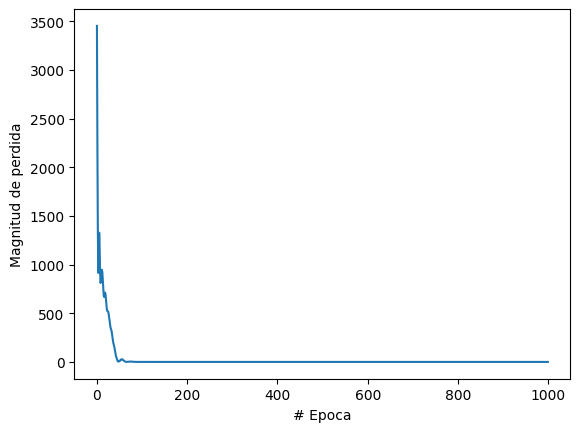

In [6]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

vemos el resultado del modelo cuanto se acerca la prediccion

In [7]:
print("Hagamos una prediccion!")
resultado = modelo.predict([100.0])
print("El resulatdo es "+str(resultado)+" Fahrenheit!")


Hagamos una prediccion!
1/1 [==============================] - 0s 416ms/step
El resulatdo es [[211.74745]] Fahrenheit!


aca vemos como trabaja el modelo se realizo el calculo: 100 * 1.79 + 31.9 = 211

In [8]:
print("Variables internas del modelo")
#print(capa.get_weights())

print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[ 0.6668173 , -0.5531011 ,  0.29983968]], dtype=float32), array([ 4.5263643, -4.880682 , -1.0895219], dtype=float32)]
[array([[-0.7807768 ,  0.64706004,  0.84622896],
       [ 0.2933953 ,  0.49091548, -1.4775101 ],
       [-0.13378969, -1.0914708 , -0.19883753]], dtype=float32), array([-1.9602643,  3.5387895,  4.7435303], dtype=float32)]
[array([[-0.4003705 ],
       [ 0.91048497],
       [ 1.2564092 ]], dtype=float32), array([4.343152], dtype=float32)]
